In [8]:
!pip list

Package                                  Version
---------------------------------------- -------------------
absl-py                                  1.4.0
accelerate                               1.12.0
access                                   1.1.10.post3
affine                                   2.4.0
aiofiles                                 24.1.0
aiohappyeyeballs                         2.6.1
aiohttp                                  3.13.3
aiosignal                                1.4.0
aiosqlite                                0.22.1
alabaster                                1.0.0
albucore                                 0.0.24
albumentations                           2.0.8
ale-py                                   0.11.2
alembic                                  1.18.1
altair                                   5.5.0
annotated-doc                            0.0.4
annotated-types                          0.7.0
antlr4-python3-runtime                   4.9.3
anyio                         

In [9]:
!python --version

Python 3.12.12


In [10]:
!pip install diffusers

In [11]:
from huggingface_hub import notebook_login

notebook_login()

In [12]:
%%capture
!sudo apt -qq install git-lfs
!git config --global credential.helper store

查询当前是否使用GPU

In [13]:
import torch
import torchvision
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from diffusers import DDPMScheduler, UNet2DModel
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

Using device: cuda


添加显示图片函数

In [6]:
import numpy as np
import torch
import torchvision
import torch.nn.functional as F
from matplotlib import pyplot as plt
from PIL import Image

def show_images(x):
  x = x * 0.5 + 0.5
  grid = torchvision.utils.make_grid(x)
  grid_im = grid.detach().cpu().permute(1,2,0).clip(0,1) * 255
  grid_im = Image.fromarray(np.array(grid_im).astype(np.uint8))
  return grid_im

def make_grid(images, size=64):
  output_im = Image.new("RGB", (size * len(images), size))
  for i,im in enumerate(images):
    output_im.paste(im.resize((size, size)), (i * size, 0))
  return output_im

# 1. 管线加载预训练模型生成图像

1. 加载管线（蛋头先生）

In [8]:
from diffusers import StableDiffusionPipeline

model_id = "sd-dreambooth-library/mr-potato-head"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(device)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/589 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

safety_checker/pytorch_model.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

text_encoder/pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/597 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/805 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--sd-dreambooth-library--mr-potato-head/snapshots/34246b94acd8b96166e8d93eaded001c380a2d4e/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--sd-dreambooth-library--mr-potato-head/snapshots/34246b94acd8b96166e8d93eaded001c380a2d4e/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--sd-dreambooth-library--mr-potato-head/snapshots/34246b94acd8b96166e8d93eaded001c380a2d4e/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--sd-dreambooth-library--mr-potato-head/snapshots/34246b94acd8b96166e8d93eaded001c380a2d4e/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
`torch_dtype` is deprecated! Use `dtype` instead!


2. 生成图像（蛋头先生.毕加索版）

  0%|          | 0/50 [00:00<?, ?it/s]

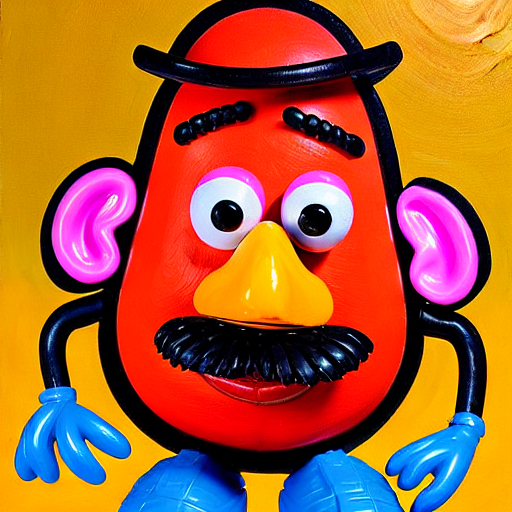

In [9]:
prompt = "an abstract oil painting of sks mr potato head by picasso"
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

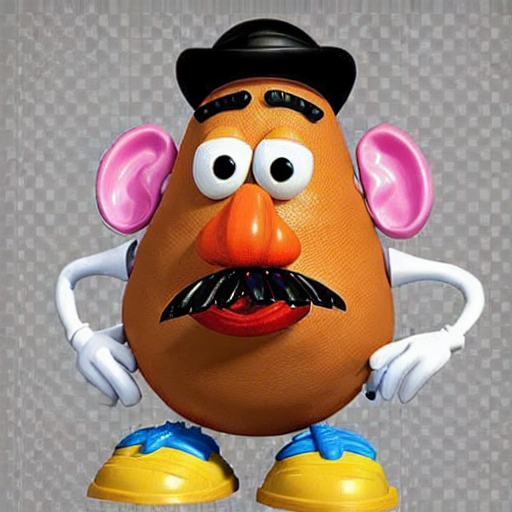

In [10]:
prompt = "an abstract oil painting of mr potato head by picasso"
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]
image

3. 加载管线并生成蝴蝶图像

model_index.json:   0%|          | 0.00/180 [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/267 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/74.3M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/702 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--johnowhitaker--ddpm-butterflies-32px/snapshots/ff99059aed185f6158729b8e9f2286c4b9c177f3: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--johnowhitaker--ddpm-butterflies-32px/snapshots/ff99059aed185f6158729b8e9f2286c4b9c177f3.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/1000 [00:00<?, ?it/s]

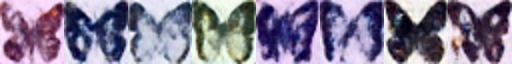

In [11]:
from diffusers import DDPMPipeline

butterfly_pipeline = DDPMPipeline.from_pretrained("johnowhitaker/ddpm-butterflies-32px").to(device)

images = butterfly_pipeline(batch_size=8).images

make_grid(images)

# 2. 自己训练生成蝴蝶图像的模型

1. 下载蝴蝶图像集，并随机显示前8张图像

Repo card metadata block was not found. Setting CardData to empty.


X shape: torch.Size([8, 3, 32, 32])


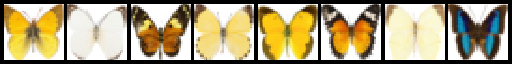

In [14]:
import torch
from datasets import load_dataset
from torchvision import transforms

dataset = load_dataset("huggan/smithsonian_butterflies_subset", split="train")
# 从本地文件夹中加载图像
# dataset = load_dataset("imagefolder", data_dir="path/to/folder")

# 使用32x32像素的正方形图像进行训练，也可以尝试使用更大尺寸的
image_size = 32

# GPU内存不足时，也可以减小batch_size
batch_size = 64

# 定义数据增强过程
preprocess = transforms.Compose(
    [
        transforms.Resize((image_size, image_size)),  # 调整大小
        transforms.RandomHorizontalFlip(),  # 随机反转
        transforms.ToTensor(),  # 将张量映射到(0,1)区间
        transforms.Normalize([0.5], [0.5]),  # 映射到(-1,1)区间
    ]
)

def transform(examples):
  images = [preprocess(image.convert("RGB")) for image in examples["image"]]
  return {"images": images}

dataset.set_transform(transform)

# 创建数据加载器，批量提供经过变换的图像
train_dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

# 取出一批图像数据并进行可视化
xb = next(iter(train_dataloader))["images"].to(device)[:8]
print("X shape:", xb.shape)
show_images(xb).resize((8 * 64, 64), resample=Image.NEAREST)

# 输出结果： X shape: torch.Size([8, 3, 32, 32])

2. 添加调度器(加噪)

Noisy X shape torch.Size([8, 3, 32, 32])


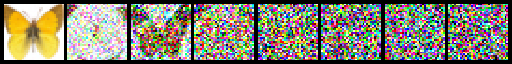

In [17]:
from diffusers import DDPMScheduler
noise_scheduler = DDPMScheduler(num_train_timesteps=1000)

# 通过修改下面的参数来对调度器的超参数beta进行控制

# beta_start：推理阶段开始时 beta 的值
# beta_end：控制 beta 的最终值
# 示例1： noise_scheduler = DDPMScheduler(num_train_timesteps=1000, beta_start=0.001, beta_end=0.004)

# beta_schedule：通过函数映射来为模型推理的每一步生成一个 beta 值（下面示例为cosine函数的调度方式）
# 示例2： noise_scheduler = DDPMScheduler(num_train_timesteps=1000, beta_schedule='squaredcos_cap_v2')


timesteps = torch.linspace(0, 999, 8).long().to(device)
noise = torch.randn_like(xb)
noisy_xb = noise_scheduler.add_noise(xb, noise, timesteps)
print("Noisy X shape", noisy_xb.shape)
show_images(noisy_xb).resize((8 * 64, 64), resample=Image.NEAREST)

3. 定义扩散模型